In [2]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

In [3]:
D = 4.419 #*0.0367493 # eV -> Hartree
D1 = 1 #*0.0367493 # eV -> Hartree
D2 = 10 #*0.0367493 # eV -> Hartree
alpha = 2.567 # Angstrom(-1) 
q_0 = 0 # Angstrom
q = np.linspace(-10, 10, 1000) # Angstrom

potential = D * (1 - np.exp(-alpha*(q-q_0)))**2
potential1 = D1 * (1 - np.exp(-alpha*(q-q_0)))**2
potential2 = D2 * (1 - np.exp(-alpha*(q-q_0)))**2

# Above values given in QHD paper for water O-H stretch

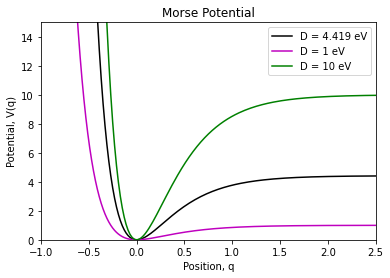

In [4]:
plt.plot(q, potential, 'k')
plt.plot(q, potential1, 'm')
plt.plot(q, potential2, "g")
plt.legend(["D = 4.419 eV", "D = 1 eV", "D = 10 eV"])
plt.title("Morse Potential") # Title of the graph
plt.ylim(0, 15) # (Lower, Upper) limit of the y-axis
plt.ylabel("Potential, V(q)") 
plt.xlim(-1, 2.5) # (Lower, Upper) limit of the x-axis
plt.xlabel("Position, q")
plt.savefig('morse_vVq.png') # Save to this file name, as a png file
plt.show()

In [5]:
# First, we must define all the parameters as stated in section 1 as symbols:

D, alpha, q = symbols("D, alpha, q")
q_0 = 0.0

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = D * (1 - exp(-alpha*(q-q_0)))**2

In [6]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

In [7]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")
q_0 = 0.0
########## EOM Calculations ##########

# If you want to see the output of any of the below, uncomment the desired print line. #

# There are two ways to derive the EOM's, using the `time_deriv` function and then the original way is with `QHD_int`
# The `time_deriv` function is used as it's more versatile at this time, however it's still not perfect.
# `QHD_int` uses the `time_deriv` function

px = xp
q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))


p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = str(p1)
p1 = sympify(p1)
p1 = str(symmetrize(p1)*(0.5)*dt + p)
print("p = " + str(p1))

p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = str(-p21)
p21 = str(symmetrize(p21)*(0.5)*dt + p2)
print("p2 = " + str(p21))

q = dt*p/mass + q
p = dt*(-1.0*D*alpha*exp(-alpha*q) + 1.0*D*alpha*exp(-2*alpha*q)) + p
p2 = dt*(-2.0*D*alpha*p*exp(-alpha*q) + 2.0*D*alpha*p*exp(-2*alpha*q)) + p2


In [8]:
##### Constants #####

hbar = 0.6582  # eV * fs
convert = (1.0/17.586)
mass, q0, p0, s0, ps0, T, dt = 2980.0*convert, 0.15, 0.0, 0.05, 0.0, 500, 0.1
alp = 2.567
alpha = alp


D = 4.419
#D = 1
#D = 10

##### Initial Conditions #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

##### ----- #####

p2 = eval(p21)

p = eval(p1)

q = eval(q1)

p = eval(p1)

p2 = eval(p21)

##### Empty Lists for Data Storage: #####

q_list = [] 
p_list = []

In [9]:
### Time how long it takes to compute ###

import time 
begin = time.time()


### Compute the x values ###

dt = 0.1 # step size
t_i = 0.0 # start
t_f = 1000 # finish


### Compute the y values ###

i=0
while i<1:        
    s = (q2 - q*q)
    if s>0.0:
        s = math.sqrt(s)
    else: 
        s = 0.0
    if s>0.0:
        ps = (pq - p*q)/s
    else: 
        ps = 0.0
    i = i+1


while t_i<=t_f:

    p2 = eval(p21)

    p = eval(p1)

    q = eval(q1)

    p = eval(p1)

    p2 = eval(p21)


    t_i = t_i + dt
    i=0
    while i<1:
        s = (q2 - q*q)
        if s>0.0:
            s = math.sqrt(s)
        else: 
            s = 0.0
        if s>0.0:
            ps = (pq - p*q)/s
        else: 
            ps = 0.0

        i = i+1
        q_list.append(q)
        p_list.append(p)


### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 21.229649305343628


In [10]:
### Define the x values ###

x_list = np.arange(0, t_f, dt)

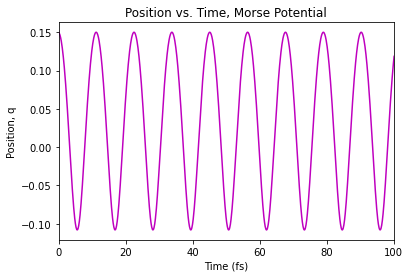

In [11]:
plt.plot(x_list, q_list, 'm')
plt.title("Position vs. Time, Morse Potential")
plt.xlim(0, 100)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig("Morse_Classical.png")
plt.show()

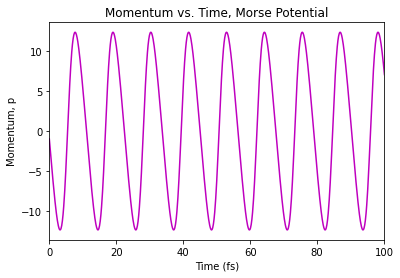

In [12]:
plt.plot(x_list, p_list, 'm')
#plt.plot([0, 5000], [0, 0], "k")
plt.title("Momentum vs. Time, Morse Potential")
plt.xlim(0, 100)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Momentum, p")
plt.savefig("Morse_Classical_pvt.png")
plt.show()